### Importing the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [3]:
data = pd.read_csv(r"D:\DS\diabetes.csv")

### Reading the dataset columns

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               750 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.isnull().sum()

Pregnancies                 18
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

### Handling the missing data

In [16]:
data['Pregnancies'] = data['Pregnancies'].fillna(data['Pregnancies'].median())

In [20]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [22]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking for duplicate data

In [26]:
data.duplicated().sum()

0

### Removing the duplicate data

In [38]:
df = data.copy()
df.drop_duplicates(inplace=True)

In [40]:
f"Duplicated rows: {df.duplicated().sum()}"

'Duplicated rows: 0'

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


### Changing the data types

In [44]:
dtype = {
    'Pregnancies': 'int64',
    'Glucose': 'float64',
    'BloodPressure': 'float64',
    'SkinThickness': 'float64',
    'Insulin': 'float64',
    'BMI': 'float64',
    'DiabetesPedigreeFunction': 'float64',
    'Age': 'int64',
    'Outcome': 'int64'
}

In [46]:
data_clean = data.astype(dtype)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Finding the outliers

In [49]:
def find_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    condition = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df[condition]
    
    return outliers

In [51]:
age_outliers = find_outliers(data_clean, 'Age')
age_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132.0,80.0,0.0,0.0,26.8,0.186,69,0
363,4,146.0,78.0,0.0,0.0,38.5,0.520,67,1
453,2,119.0,0.0,0.0,0.0,19.6,0.832,72,0
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0
489,8,194.0,80.0,0.0,0.0,26.1,0.551,67,0
537,0,57.0,60.0,0.0,0.0,21.7,0.735,67,0
666,4,145.0,82.0,18.0,0.0,32.5,0.235,70,1
674,8,91.0,82.0,0.0,0.0,35.6,0.587,68,0
684,5,136.0,82.0,0.0,0.0,0.0,0.640,69,0


### Data Visualization

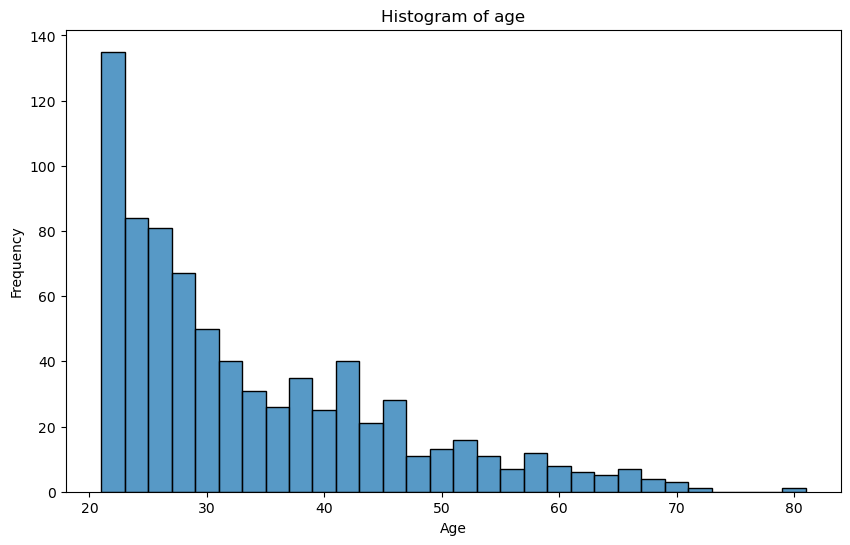

In [53]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Age'], bins=30)
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

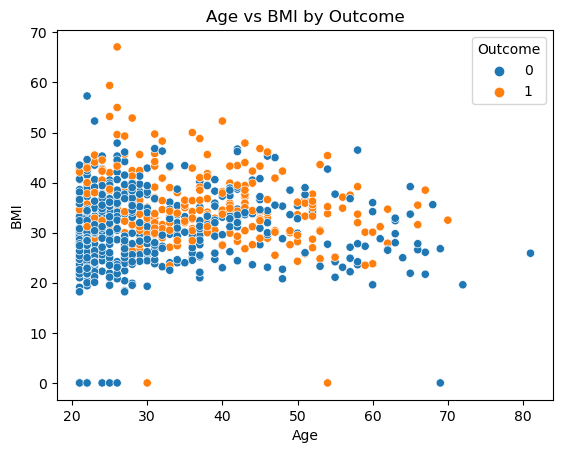

In [59]:
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=data_clean)
plt.title('Age vs BMI by Outcome')
plt.show()

### Analyzing Categorical column

In [62]:
categorical_cols = data_clean.describe(include='category').columns

ValueError: No objects to concatenate

### Data Normalization

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [68]:
df['Glucose'] = scaler.fit_transform(df[['Glucose']])
print("\nAfter Min-Max Scaling:")
df['Glucose'].describe()


After Min-Max Scaling:


count    768.000000
mean       0.607510
std        0.160666
min        0.000000
25%        0.497487
50%        0.587940
75%        0.704774
max        1.000000
Name: Glucose, dtype: float64

### Train Test Split

In [73]:
# Separate features (X) and target (y)
X = df.drop(columns=['Outcome']).values  # All columns except 'Obesity'
y = df['Outcome']  # Target column

In [75]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Display the split datasets
print("Train set:",X_train.shape,y_train.shape)
print("\nTest set:",X_test.shape,y_test.shape)

Train set: (537, 8) (537,)

Test set: (231, 8) (231,)


### Feature Engineering

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
# Initialize and fit RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
# Get feature importance
feature_importances = model.feature_importances_

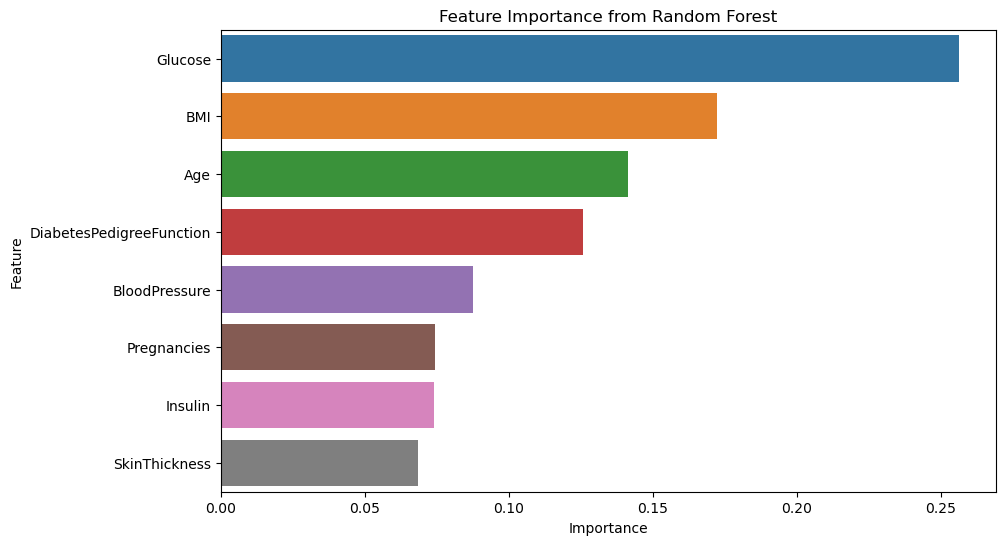

In [92]:
# Assuming X is a pandas DataFrame
X = df.drop(columns=['Outcome'])  # Make sure X is a DataFrame

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and their importance
feature_df = pd.DataFrame({
    'Feature': X.columns,  # Use the column names from the DataFrame
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
